In [5]:
import sys
sys.path.insert(1, '/home/nicolas/Documents/Stage/code/prestage/')
import torch
import rbm
import time
import numpy as np
import matplotlib.pyplot as plt
import h5py
#device = torch.device("cpu")
device = torch.device("cuda")
dtype = torch.float


In [18]:
# Load RBM : put the couplings file here 
fname = 'AllParametersTESTCV2_LongRUNExMC_NS10000_TEMP_0_MNIST_Nh500_lr0.01_l20_NGibbs10000.h5'
f = h5py.File(fname,'r')

Nh = f['paramW1'].shape[0] # get the visible shape
Nv = f['paramW1'].shape[1] # get the hidden shape
# usefull if you want to use the RBN
lr = 0.01
l2 = 0
NGibbs = 100
annSteps = 0
mb_s = 500
num_pcd = 500

# creating the RBM
myRBM = rbm.RBM(num_visible=Nv,
				num_hidden=Nh,
				device=device,
				lr=lr,
				#regL2=l2,
				gibbs_steps=NGibbs,
				#anneal_steps=annSteps,
				UpdCentered=True,
				mb_s=mb_s,
				num_pcd=num_pcd)     


In [20]:
# print the timestamp
print(f['alltime'][:])

# Get all registered times
alltimes = []
for t in f['alltime'][:]:
    if 'paramW'+str(t) in f:
        alltimes.append(t)

[        0         1         2         3         4         5         6
         8         9        10        12        14        15        16
        18        22        24        25        26        28        32
        38        41        42        43        45        48        49
        55        65        69        70        71        73        77
        82        83        93       110       118       119       120
       122       126       132       138       142       159       187
       201       202       203       205       209       215       225
       236       242       270       319       342       343       344
       346       350       356       366       383       402       411
       460       543       582       583       584       586       590
       596       606       623       651       684       700       783
       924       990       991       992       994       998      1004
      1014      1031      1059      1108      1164      1191      1332
      

In [21]:
len(f['alltime'])

625

In [10]:
all_mi = []

for t in np.array(alltimes)[[1,100,279]]:
    myRBM.W = torch.tensor(f['paramW'+str(t)], device = myRBM.device)
    myRBM.vbias = torch.tensor(f['paramVB'+str(t)], device = myRBM.device)
    myRBM.hbias = torch.tensor(f['paramHB'+str(t)], device = myRBM.device)
    vinit = torch.bernoulli(torch.rand((myRBM.Nv,100), device=myRBM.device, dtype=myRBM.dtype))
    
    si,mi,_,_ = myRBM.Sampling(vinit,it_mcmc=10000)#,anneal_steps=0)
    all_mi.append(mi)

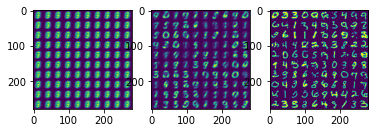

In [16]:
f,ax = plt.subplots(1,len(all_mi))
for idx in range(len(all_mi)):
    Im = myRBM.ImConcat(all_mi[idx].t(),sx=28,sy=28,ncol=10,nrow=10,ch=1)
    ax[idx].imshow(Im.cpu())

In [22]:
len(all_mi)

3